In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Linear Regression

In [2]:
def inference(w,b,x):
    return w*x+b

In [3]:
#Loss Function

In [4]:
def loss_function(w,b,x_list,gt_y_list):
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (w*x_list[i]+b - gt_y_list[i])**2
    avg_loss /= len(x_list)
    return avg_loss

In [5]:
#梯度计算
def gradient(pred_y , gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw,db

In [25]:
#全部样本（batchsize）为w,b带来的更新
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b ,lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    for i in range(batch_size):
        pred_y = inference(w, b, batch_x_list[i])
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i])
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b


In [26]:
#生成数据
def gen_sample_data():
    w = random.randint(0,10)+random.random()
    b = random.randint(0,5)+random.random()
    #print(w)
    num_sample = 100
    x_list = []
    y_list = []
    print(w,b)
    for i in range(num_sample):
        x = random.randint(0,100)*random.random()
        y = w * x + b + random.random()*random.randint(-5,20)
        x_list.append(x)
        y_list.append(y)
    return x_list,y_list

5.819710763199667 4.974978167447729


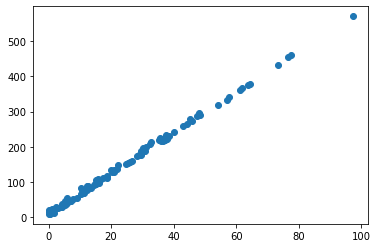

In [27]:
x_list, y_list = gen_sample_data()
plt.scatter(x_list,y_list)
plt.show()

In [28]:
def train(x_list,gt_y_list,batch_size,lr,max_iterations):
    w,b = 0,0
    num_sample = len(x_list)
    for i in range(max_iterations):
        batch_idxs = np.random.choice(len(x_list),batch_size)
        batch_x = [x_list[j] for j in batch_idxs]
        batch_y = [gt_y_list[j] for j in batch_idxs]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        #w,b = cal_step_gradient(batch_x,batch_y,w,b,lr)
        print('w:{0}, b{1}'.format(w,b))
        print('loss:{}'.format(loss_function(w,b,x_list,gt_y_list)))
    return w,b

In [29]:
train(x_list,y_list,80,0.001,500)

w:6.042208223941391, b0.1543346342559798
loss:33.02224134483183
w:6.030555753439375, b0.15880918666514782
loss:32.83511672195376
w:6.046107699350224, b0.16274943903954128
loss:33.08256607959674
w:6.043195768439801, b0.1670937737974109
loss:32.99957748701601
w:6.030100358955522, b0.17057583943065557
loss:32.7872795668724
w:5.981358407423785, b0.17380652786686746
loss:33.588070916413386
w:5.985896497499495, b0.17846941628882845
loss:33.385861627294474
w:6.006999589786141, b0.1825370763170665
loss:32.81579399543496
w:5.984740152173935, b0.1864460054557198
loss:33.39078577025406
w:5.999080162335749, b0.1904670987334236
loss:32.93261875226951
w:6.024349227388308, b0.19414388027835242
loss:32.66438973484421
w:5.996127602289594, b0.1980896279059373
loss:32.970781113928034
w:6.034279020079644, b0.20354299961868227
loss:32.7128550553512
w:6.01653491715995, b0.20792939236863534
loss:32.615821999546746
w:6.065153341197765, b0.21345262839932877
loss:33.60124565184582
w:5.9962030751375055, b0.21491

(5.939267463047452, 1.9239380135338364)